Columns Description
(available at https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)

| column           | datatype      | description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | range                           |
|------------------|---------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------|
| acousticness     | number<float> | A confidence measure from 0.0 to 1.0 of whether the track is   acoustic. 1.0 represents high confidence the track is acoustic.                                                                                                                                                                                                                                                                                                                                                                                                 | [0, 1]                          |
| analysis_url     | string        | A URL to access the full   audio analysis of this track. An access token is required to access this   data.                                                                                                                                                                                                                                                                                                                                                                                                                    |                                 |
| danceability     | number<float> | Danceability describes how suitable a track is for dancing   based on a combination of musical elements including tempo, rhythm stability,   beat strength, and overall regularity. A value of 0.0 is least danceable and   1.0 is most danceable.                                                                                                                                                                                                                                                                             | [0, 1]                          |
| duration_ms      | integer       | The duration of the track   in milliseconds.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |                                 |
| energy           | number<float> | Energy is a measure from 0.0 to 1.0 and represents a   perceptual measure of intensity and activity. Typically, energetic tracks   feel fast, loud, and noisy. For example, death metal has high energy, while a   Bach prelude scores low on the scale. Perceptual features contributing to   this attribute include dynamic range, perceived loudness, timbre, onset rate,   and general entropy.                                                                                                                            | [0, 1]                          |
| id               | string        | The Spotify ID for the   track.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |                                 |
| instrumentalness | number<float> | Predicts whether a track contains no vocals. "Ooh"   and "aah" sounds are treated as instrumental in this context. Rap   or spoken word tracks are clearly "vocal". The closer the   instrumentalness value is to 1.0, the greater likelihood the track contains   no vocal content. Values above 0.5 are intended to represent instrumental   tracks, but confidence is higher as the value approaches 1.0.                                                                                                                   | [0, 1]                          |
| key              | integer       | The key the track is in. Integers   map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2   = D, and so on. If no key was detected, the value is -1.                                                                                                                                                                                                                                                                                                                                                    | [-1, 11]                        |
| liveness         | number<float> | Detects the presence of an audience in the recording. Higher   liveness values represent an increased probability that the track was   performed live. A value above 0.8 provides strong likelihood that the track   is live.                                                                                                                                                                                                                                                                                                  | [0, 1]                          |
| loudness         | number<float> | The overall loudness of a   track in decibels (dB). Loudness values are averaged across the entire track   and are useful for comparing relative loudness of tracks. Loudness is the   quality of a sound that is the primary psychological correlate of physical strength   (amplitude). Values typically range between -60 and 0 db.                                                                                                                                                                                         |                                 |
| mode             | integer       | Mode indicates the modality (major or minor) of a track, the   type of scale from which its melodic content is derived. Major is represented   by 1 and minor is 0.                                                                                                                                                                                                                                                                                                                                                            | 1 or 0                          |
| speechiness      | number<float> | Speechiness detects the presence of spoken words in a track.   The more exclusively speech-like the recording (e.g. talk show, audio book,   poetry), the closer to 1.0 the attribute value. Values above 0.66 describe   tracks that are probably made entirely of spoken words. Values between 0.33   and 0.66 describe tracks that may contain both music and speech, either in   sections or layered, including such cases as rap music. Values below 0.33   most likely represent music and other non-speech-like tracks. | [0, 1]                          |
| tempo            | number<float> | The overall estimated   tempo of a track in beats per minute (BPM). In musical terminology, tempo is   the speed or pace of a given piece and derives directly from the average beat   duration.                                                                                                                                                                                                                                                                                                                               |                                 |
| time_signature   | integer       | An estimated time signature. The time signature (meter) is a   notational convention to specify how many beats are in each bar (or measure).   The time signature ranges from 3 to 7 indicating time signatures of   "3/4", to "7/4".                                                                                                                                                                                                                                                                                          | [3, 7]                          |
| track_href       | string        | A link to the Web API   endpoint providing full details of the track.                                                                                                                                                                                                                                                                                                                                                                                                                                                          |                                 |
| type             | string        | The object type.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               | Allowed value: "audio_features" |
| uri              | string        | The Spotify URI for the   track.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |                                 |
| valence          | number<float> | A measure from 0.0 to 1.0 describing the musical positiveness   conveyed by a track. Tracks with high valence sound more positive (e.g.   happy, cheerful, euphoric), while tracks with low valence sound more negative   (e.g. sad, depressed, angry).                                                                                                                                                                                                                                                                        | [0, 1]                          |

In [1]:
import pandas as pd

# refer to 
#   https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features
# for column descriptions 

raw = pd.read_json('./data/output.json').set_index('id')
raw = raw.drop(['type', 'analysis_url', 'track_href', 'uri'], axis=1)

In [3]:
def label_speech(v): 
    return 0 if v <= (1./3) else 1 if v <= (2./3) else 2

binned = raw.copy()
binned['instrumental'] = (binned['instrumentalness'] > 0.5).astype(int)
binned['speech_level'] = binned.apply(lambda row: label_speech(row['speechiness']), axis=1)

In [78]:
from sklearn.preprocessing import RobustScaler

rb = RobustScaler()

scaled = binned.copy()
scaled[:] = rb.fit_transform(scaled)

In [144]:
from sklearn.decomposition import PCA

scaled2 = scaled.copy(deep=True)
  # place importance/emphasis on DEV
scaled2[['danceability', 'energy', 'valence']] = scaled2[['danceability', 'energy', 'valence']] * 1e10

princ = pd.DataFrame(data=PCA(n_components=3).fit_transform(scaled2), columns=['pc1','pc2','pc3'])

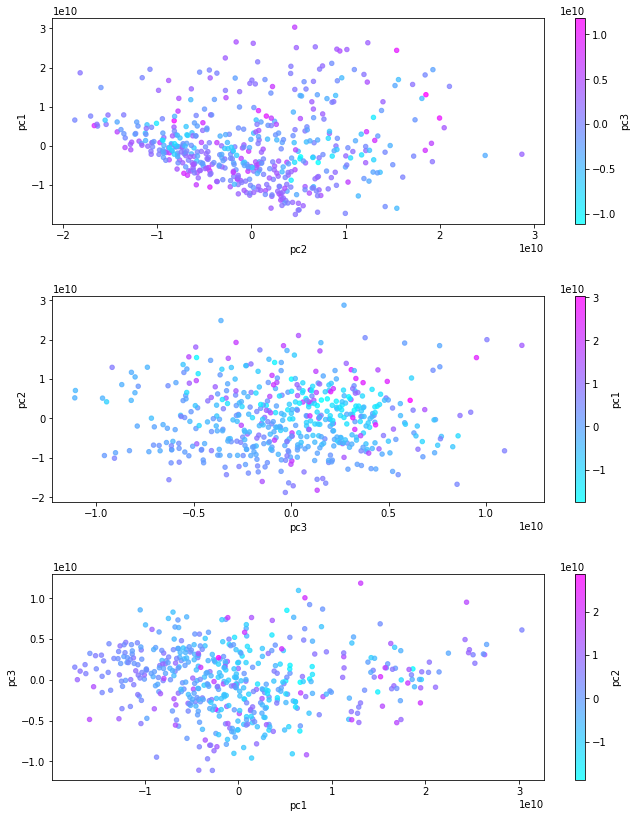

In [145]:
import matplotlib.pyplot as plt
 

fig, axes = plt.subplots(len(princ.columns.values), 1, sharey=False, sharex=False)

princ.plot.scatter('pc2', 'pc1', c='pc3', alpha=0.75, cmap='cool', ax=axes[0])
princ.plot.scatter('pc3', 'pc2', c='pc1', alpha=0.75, cmap='cool', ax=axes[1])
princ.plot.scatter('pc1', 'pc3', c='pc2', alpha=0.75, cmap='cool', ax=axes[2])

fig.tight_layout(pad=3)
plt.show()

In [ ]:
# plot princ into folder, to be gif-ified

# x = princ['pc1']
# y = princ['pc2']
# z = princ['pc3']
 
# # Creating figure
# fig = plt.figure(figsize=(14,12))
# ax = fig.add_subplot(projection='3d')

# #ax.set_axis_off()

# # Creating plot
# ax.scatter(x, y, alpha=0.7, c=y)

# v, h, ctr = -45, 0, 1
# while v <= 45:
#     v += 0.25
#     h += 3

#     ax.view_init(v, h)
#     plt.savefig(f'./out/pca_unscaled_3/{ctr}.png')
#     ctr += 1

In [ ]:
# plot each column histogram

# import matplotlib.pyplot as plt


# cmap = ['#e5e243', '#49c442', '#7da541', '#a08b3d', '#cb721f', '#5178d5', '#075c64', '#013ded', '#091d5b', '#0935a6', '#c8486b', '#175c6a', '#6d88e7']
# for i, col in enumerate(scaled.columns):
#     std = scaled[col].describe()['std']
#     scaled[col].plot.hist(title=col, label='std: %.2f' % std, color=cmap[i])
#     plt.legend()
#     plt.show()

In [112]:
from numpy import mean

def get_performance(indicator: pd.DataFrame, labels: pd.Series, clusters = -1) -> float:
    if clusters == -1: clusters = len(set(labels))

    return mean([indicator[labels == k].std().mean() for k in range(clusters)])

# performance tries to quantify improvement of homogeneity
# assuming a Spotify Liked Songs playlist is initially quite homogenous,
# clustering should seek to improve homogeneity intracluster, and ignore heterogeneity intercluster
# homogeneity is measured using standard deviation ("std") across all columns 

# performance is defined as follows:
# performance of K = average standard deviation of all indicator columns of observations of K
# smaller std = "better"


In [146]:
from sklearn.cluster import AgglomerativeClustering as a
from numpy import bincount


N_CLUSTERS = 3

cl = a(n_clusters=N_CLUSTERS)

X = princ.copy()

y = cl.fit_predict(princ)

print('Peformance:', get_performance(scaled, y))

print('sizes of each cluster')
for i, s in enumerate(bincount(y)):
    print(f'cluster {i}: {s}')

Peformance: 36.7403712810418
sizes of each cluster
cluster 0: 247
cluster 1: 69
cluster 2: 178


In [19]:
# import matplotlib.pyplot as plt
 
 
# x = scaled['valence']
# y = scaled['danceability']
# z = scaled['energy']
 
# # Creating figure
# fig = plt.figure(figsize=(14,12))
# ax = fig.add_subplot(projection='3d')
# plt.title("valence-danceability-energy")

# #ax.set_axis_off()

# # Creating plot
# ax.scatter(x, y, z, alpha=0.7, c=y)

# v, h, ctr = -45, 0, 1
# while v <= 45:
#     v += 0.2
#     h += 3

#     ax.view_init(v, h)
#     plt.savefig(f'./out/plot_test_{N_CLUSTERS}c/{ctr}.png')
#     ctr += 1

In [148]:
from os import listdir, remove
# clear output folder
for f in listdir('.\data\plcodes'):
    remove(f'.\data\plcodes\{f}')

# write
for k in range(N_CLUSTERS):
    with open(f'.\data\plcodes\playlist_{k}.txt', 'w+') as f:
        for _id in (scaled[y == k].index):
            f.write(f'{_id}\n')